***Breadth-First Search (BFS)***

* BFS is a traversing algorithm where you should start traversing from a selected node (source or starting node) and traverse the graph layerwise thus exploring the neighbour nodes (nodes which are directly connected to source node). You must then move towards the next-level neighbour nodes.
* As the name BFS suggests, you are required to traverse the graph breadthwise as follows:
1) First move horizontally and visit all the nodes of the current layer
2) Move to the next layer/level
* The distance between the nodes in layer 1 is comparitively lesser than the distance between the nodes in layer 2. Therefore, in BFS, you must traverse all the nodes in layer 1 before you move to the nodes in layer 2.

The Node class is used to represent a node in the graph.

In [ ]:
class Node:
    def __init__(self, state, parent, actions, totalcost):
        self.state = state      # Stores the name of the node (e.g., 'A', 'B', etc.)
        self.parent = parent    # Stores the parent node (used for backtracking the path)
        self.actions = actions  # Stores the list of neighboring nodes (connected nodes)
        self.totalcost = totalcost  # Not used in this BFS implementation

In [ ]:
# he key in the dictionary (graph) represents the name (label) of the node.
graph = {'A': Node('A',None, ['B', 'C', 'E'], None),
         'B': Node('B',None, ['A', 'D', 'E'], None),
         'C': Node('C',None, ['A', 'F', 'G'], None),
         'D': Node('D',None, ['B', 'E'], None),
         'E': Node('E',None, ['A', 'B', 'D'], None),
         'F': Node('F',None, ['C'], None),
         'G': Node('G',None, ['C'], None)}

In [ ]:
def actionsequence(graph, initialstate, goalstate):
    solution = [goalstate]  # Start with the goal node
    currentparent = graph[goalstate].parent  # Get the parent of the goal node
    
    # Following stores the parent of each node so we can later reconstruct the path from the goal node to the start node.
    while currentparent is not None:  # Keep going up until we reach the root node
        solution.append(currentparent)
        currentparent = graph[currentparent].parent  # Move to the next parent
    
    solution.reverse()  # Reverse the list to get the path from start to goal
    return solution  # Return the path as a list of node names


In [ ]:
def BFS():
    initialstate = 'A'  # Define the starting node
    goalstate = 'F'     # Define the goal node
    
    # Graph representation using dictionary
    #Initially, all nodes have parent=None because no path has been explored yet.
    graph = {
        'A': Node('A', None, ['B', 'C', 'E'], None),
        'B': Node('B', None, ['A', 'D', 'E'], None),
        'C': Node('C', None, ['A', 'F', 'G'], None),
        'D': Node('D', None, ['B', 'E'], None),
        'E': Node('E', None, ['A', 'B', 'D'], None),
        'F': Node('F', None, ['C'], None),
        'G': Node('G', None, ['C'], None)
    }

    frontier = [initialstate]  # BFS queue (starting with 'A')
    explored = []  # List of visited nodes
    
    while len(frontier) != 0:     # Continue until all nodes are explored
        currentnode = frontier.pop(0)  # Dequeue first node (FIFO)
        explored.append(currentnode)   # Mark node as explored

        #For each neighbor of currentnode:
        #If the neighbor is not in frontier (not in queue).
        #If the neighbor is not in explored (not visited).
        #Set the parent so we can later retrace the path.
        
        for child in graph[currentnode].actions:   # Loop through neighbors
            if child not in frontier and child not in explored:  # Check if not visited
                graph[child].parent = currentnode    # Set parent for path tracking
                
                if graph[child].state == goalstate:  # Goal reached
                    return actionsequence(graph, initialstate, goalstate)  #return path
                
                frontier.append(child)  # Add child node to queue for future exploration

In [ ]:
solution=BFS()
print(solution)

*Activity 1:*
* Imagine going from Arad to Bucharest in the Romania map below. Implement a BFS to find the corresponding path.


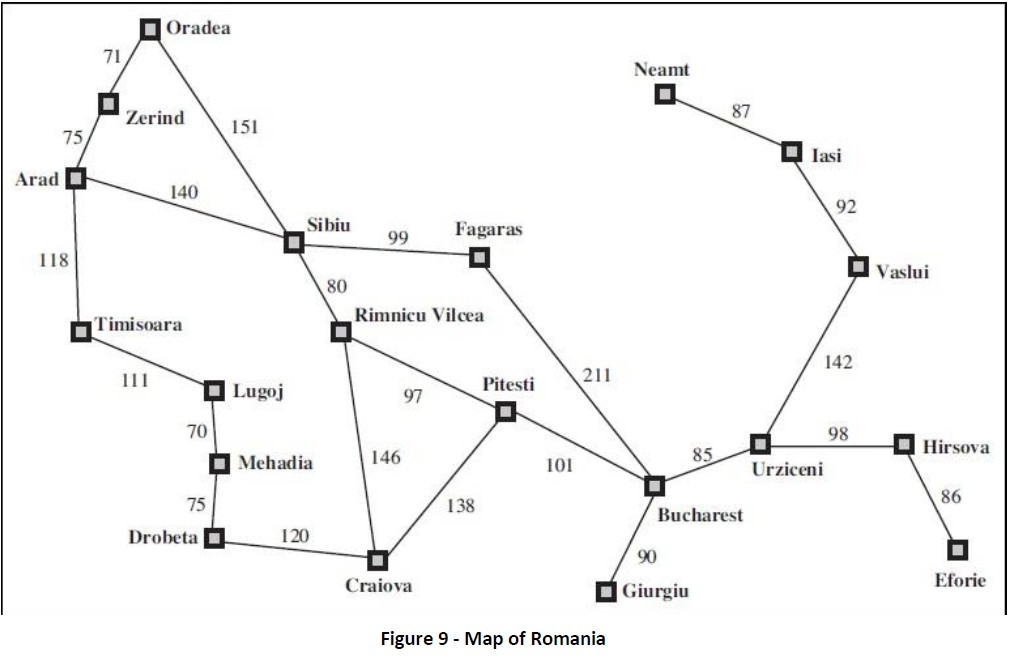

In [ ]:
def BFS():
    initialstate = 'Arad'
    goalstate = 'Bucharest'
    
    # Graph representation of Romania map
    graph = {
        'Arad': Node('Arad', None, ['Zerind', 'Timisoara', 'Sibiu'], None),
        'Zerind': Node('Zerind', None, ['Arad', 'Oradea'], None),
        'Oradea': Node('Oradea', None, ['Zerind', 'Sibiu'], None),
        'Timisoara': Node('Timisoara', None, ['Arad', 'Lugoj'], None),
        'Lugoj': Node('Lugoj', None, ['Timisoara', 'Mehadia'], None),
        'Mehadia': Node('Mehadia', None, ['Lugoj', 'Drobeta'], None),
        'Drobeta': Node('Drobeta', None, ['Mehadia', 'Craiova'], None),
        'Craiova': Node('Craiova', None, ['Drobeta', 'Rimnicu Vilcea', 'Pitesti'], None),
        'Rimnicu Vilcea': Node('Rimnicu Vilcea', None, ['Sibiu', 'Craiova', 'Pitesti'], None),
        'Sibiu': Node('Sibiu', None, ['Arad', 'Oradea', 'Fagaras', 'Rimnicu Vilcea'], None),
        'Fagaras': Node('Fagaras', None, ['Sibiu', 'Bucharest'], None),
        'Pitesti': Node('Pitesti', None, ['Rimnicu Vilcea', 'Craiova', 'Bucharest'], None),
        'Bucharest': Node('Bucharest', None, ['Fagaras', 'Pitesti', 'Urziceni', 'Giurgiu'], None),
        'Giurgiu': Node('Giurgiu', None, ['Bucharest'], None),
        'Urziceni': Node('Urziceni', None, ['Bucharest', 'Vaslui', 'Hirsova'], None),
        'Vaslui': Node('Vaslui', None, ['Urziceni', 'Iasi'], None),
        'Iasi': Node('Iasi', None, ['Vaslui', 'Neamt'], None),
        'Neamt': Node('Neamt', None, ['Iasi'], None),
        'Hirsova': Node('Hirsova', None, ['Urziceni', 'Eforie'], None),
        'Eforie': Node('Eforie', None, ['Hirsova'], None)
    }

    frontier = [initialstate]  # Queue to process nodes (FIFO for BFS)
    explored = []  # List of visited nodes
    
    while frontier:
        currentnode = frontier.pop(0)  # Pop from front (FIFO queue behavior)
        explored.append(currentnode)  # Mark as explored
        
        # Loop through the neighbors of the current node
        for child in graph[currentnode].actions:
            if child not in frontier and child not in explored:
                graph[child].parent = currentnode  # Set parent for path tracking
                if graph[child].state == goalstate:
                    return actionsequence(graph, initialstate, goalstate)
                frontier.append(child)  # Add to frontier for BFS exploration

solution = BFS()
print("Path from Arad to Bucharest using BFS:", solution)

*Task 2:*
* Consider a maze as shown in figure below. Each empty tile represents a separate node in the graph. There are maximum of four possible actions i.e., to move up, down, left or right on any given tile/node. Using BFS, find out how to get out of the maze if you’re in the start position depicted below. 

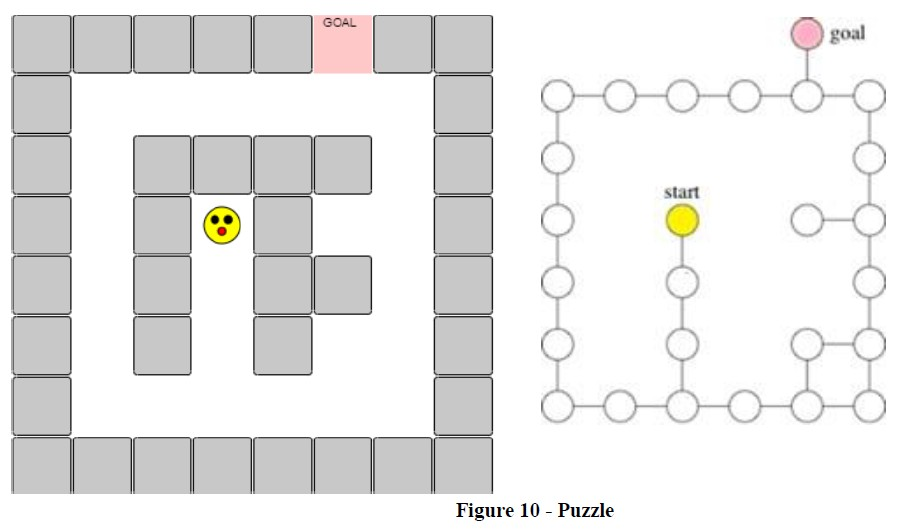

In [ ]:
# Define the Node class to represent each position in the maze
class Node:
    def __init__(self, state, parent, actions):
        self.state = state      # The current position (row, col) in the maze
        self.parent = parent    # Parent node (used for backtracking the solution path)
        self.actions = actions  # Possible moves from this node

# Function to retrieve the solution path after reaching the goal
def actionsequence(graph, initialstate, goalstate):
    solution = [goalstate]  # Start from goal and move backwards
    currentparent = graph[goalstate].parent
    while currentparent is not None:
        solution.append(currentparent)
        currentparent = graph[currentparent].parent
    solution.reverse()  # Reverse to get path from start to goal
    return solution

# Breadth-First Search (BFS) algorithm to solve the maze
def BFS():
    initialstate = (2, 1)  # Starting position in the maze (row, col)
    goalstate = (0, 5)  # Goal position
    
    # Maze representation (0: empty space, 1: wall)
    maze = [
        [1, 1, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 0, 1],
        [1, 0, 1, 0, 1, 0, 1],
        [1, 0, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1]
    ]
    
    # Get the size of the maze
    rows, cols = len(maze), len(maze[0])
    
    # Define possible movements (Up, Down, Left, Right)
    moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    # Initialize graph with nodes
    graph = {}
    for r in range(rows):
        for c in range(cols):
            if maze[r][c] == 0:  # Only create nodes for open spaces
                actions = []
                for move in moves:
                    nr, nc = r + move[0], c + move[1]
                    if 0 <= nr < rows and 0 <= nc < cols and maze[nr][nc] == 0:
                        actions.append((nr, nc))  # Add valid neighbors
                graph[(r, c)] = Node((r, c), None, actions)
    
    # BFS implementation
    frontier = [initialstate]  # Queue of nodes to explore
    explored = []  # List of visited nodes
    
    while frontier:
        currentnode = frontier.pop(0)  # FIFO queue behavior
        explored.append(currentnode)
        
        for child in graph[currentnode].actions:  # Explore neighbors
            if child not in frontier and child not in explored:
                graph[child].parent = currentnode  # Set parent for path reconstruction
                if child == goalstate:
                    return actionsequence(graph, initialstate, goalstate)
                frontier.append(child)  # Add to queue
    
    return None  # No solution found

# Run BFS and print solution
solution = BFS()
print("Path to exit:", solution)
